### **Clase 36 - Análisis Multivariado**

# >> Consigna: Realizar un pequeño análisis Multivariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

# **Realizaremos nuestro proyecto sobre una base de datos de canciones de spotify. El objetivo será predecir la popularidad de una canción en base al resto de las variables (variable target: "popularity")**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
songs = pd.read_excel('songs_normalize.xlsx')

songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Scooter,The Logical Song,234116,False,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.3000,0.000018,0.3550,0.894,95053.0,pop
1,Zara Larsson,Ain't My Fault,224030,False,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.0103,0.000000,0.6120,0.684,148726.0,"pop, rock"
2,Evanescence,Call Me When You're Sober,214706,False,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.1730,0.000000,0.2510,0.278,136859.0,"pop, country"
3,Paulo Londra,Adan y Eva,256971,False,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.0263,0.000013,0.3470,0.544,119992.0,"rock, metal"
4,Missy Elliott,4 My People (feat. Eve),289373,False,2000,65,0.614,0.928,8,-4806.0,0,0.0516,0.0408,0.001040,0.0845,0.879,172656.0,pop


In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1999 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1999 non-null   int64  
 3   explicit          1999 non-null   bool   
 4   year              1999 non-null   int64  
 5   popularity        1999 non-null   int64  
 6   danceability      1999 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   int64  
 9   loudness          1999 non-null   float64
 10  mode              1999 non-null   int64  
 11  speechiness       1999 non-null   float64
 12  acousticness      1999 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          1999 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1999 non-null   float64


In [4]:
songs.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
artist,1999,836,Rihanna,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,1999,1878,Sorry,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,1999.0,NaN,NaN,NaN,228753.857429,39145.52171,113000.0,203560.0,223293.0,248133.0,484146.0
explicit,1999,2,False,1448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1999.0,NaN,NaN,NaN,2009.490245,5.859019,1998.0,2004.0,2010.0,2015.0,2020.0
popularity,1999.0,NaN,NaN,NaN,59.865433,21.338574,0.0,56.0,65.0,73.0,89.0
danceability,1999.0,NaN,NaN,NaN,0.667419,0.140449,0.129,0.581,0.676,0.764,0.975
energy,1999.0,NaN,NaN,NaN,0.720297,0.152752,0.0549,0.622,0.736,0.839,0.999
key,1999.0,NaN,NaN,NaN,5.378189,3.615953,0.0,2.0,6.0,8.0,11.0
loudness,1999.0,NaN,NaN,NaN,-4993.74414,2429.466358,-20514.0,-6339.0,-5077.0,-3837.5,-0.276


# **Al tener muchas variables, haremos hincapié primero en nuestra variable target, y en aquellas que creemos que mayor influencia pueden llegar a tener: artista, género, año, canción y duración.**

Text(0, 0.5, 'Frequency')

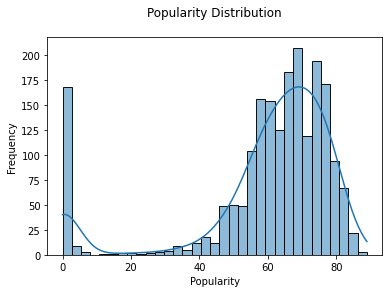

In [5]:
#Realizamos primero con histplot para ver la distribución de nuestra variable target
sns.histplot(data=(songs['popularity']), kde=True )

plt.title('Popularity Distribution\n')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

**De la distribución de nuestra variable target vemos que tenemos muchos valores con 0, lo que hace que la curva no tome una forma clara. Desde el valor 40 al máximo (89) se asemeja a una distribución normal**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

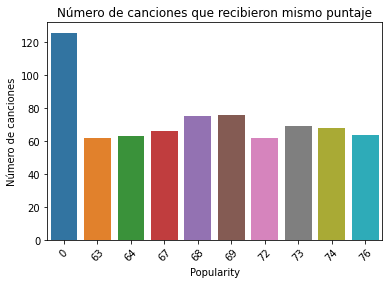

In [6]:
#Chequeamos ahora los 10 valores de nuestra variable target que más se repiten
sns.barplot(songs['popularity'].value_counts().head(10).index, songs['popularity'].value_counts().head(10))
plt.title('Número de canciones que recibieron mismo puntaje')
plt.xlabel('Popularity')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)

**Vemos que el 0 es el valor de 'popularity' que más se repite en el dataset, seguido por los valores de 68 y 69. Hay que analizar si se trata realmente de canciones con 0 popularidad, representan un poco más del 6% del conjunto de datos**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

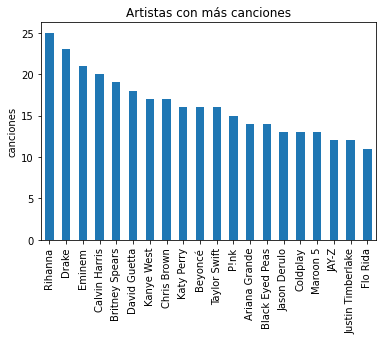

In [7]:
#Realizamos un barplot para ver cuáles son los artistas con más canciones en nuetsro dataset
songs['artist'].value_counts().head(20).plot(kind='bar')
plt.title('Artistas con más canciones')
plt.ylabel('canciones')
plt.xticks(rotation = 90)

**Vemos que en nuestro top 20 de artistas todos superan las 10 canciones en el dataset, por lo que consideramos que será una variable a tener en cuenta aunque haya muchos valroes únicos.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


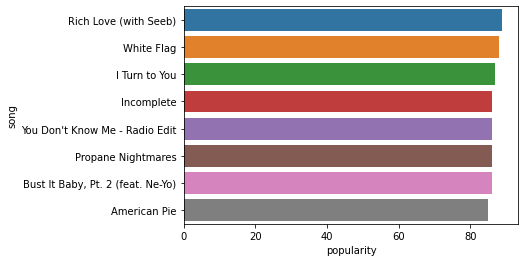

In [8]:
#Realizamos un barplot con las canciones que mayor "popularity" obtuvieron
canciones_populares = songs.nlargest(8, ['popularity']).set_index('song')['popularity']
sns.barplot(canciones_populares, canciones_populares.index)

**Podríamos trabajar sobre la variable 'song' para ver si podemos obtener mayor provecho de ella.**

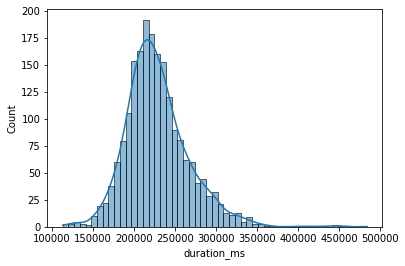

In [9]:
#Realizamos un histplot para ver la distribución de la duracion de las canciones
sns.histplot(data=(songs['duration_ms']), kde=True );

**La distribución de la duración de las canciones se asemeja a una normal, un poco sesgada a la izquierda ya que hay algunas canciones que se acercan a los 5 minutos de duración.**

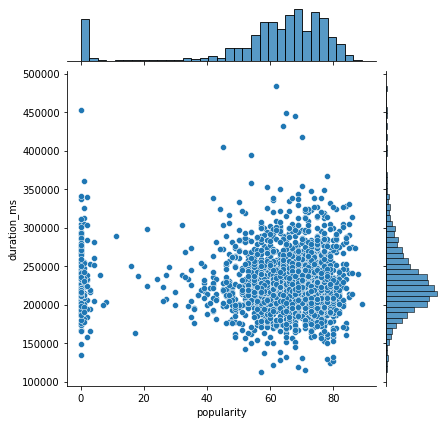

In [10]:
#comparamos ahora en un mismo gráfico la distribción de la variable duración con nuestra variable target "popularity"
sns.jointplot(x = 'popularity', y = 'duration_ms', data = songs)

**No parece haber relación entre la duración de la canción y la popularidad alcanzada, la gran cantidad de valores con popularidad 0 distorsiona el gráfico**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

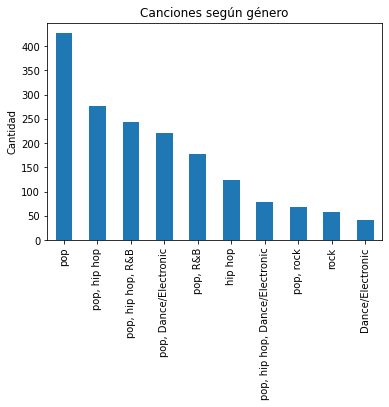

In [11]:
# genereamos un barplot para ver cuales son los géneros que mayor cantidad de canciones presentan en el dataset
songs['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Canciones según género')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Popularity')

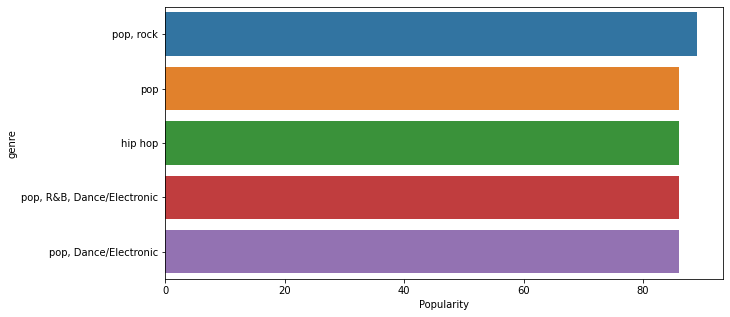

In [12]:
#generamos ahora un barplot para ver cuales son los géneros que mayor popularidad alcanzan en el dataset
plt.figure(figsize=(10, 5))
genero = songs.nlargest(10, ['popularity']).set_index('genre')
sns.barplot(genero['popularity'], genero.index, ci = None,)
plt.xlabel('Popularity')

**Observamos que todos los géneros que mayor popularidad alcanzaron con una canción están dentro del top 10 de géneros que más se repiten en el dataset, excepto por 'pop,r&b,Dance/Electronic'**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

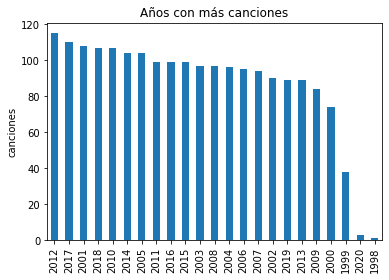

In [13]:
#realizamos un boxplot para ver la cantidad de canciones por año que tiene nuestro dataset
songs['year'].value_counts().plot(kind='bar')
plt.title('Años con más canciones')
plt.ylabel('canciones')
plt.xticks(rotation = 90)

**Vemos que la cantidad de canciones para 1998 y 2020 son muy pocas, el resto de los años superan las 70 canciones exceptuando 1999. Hay que evaluar las canciones en los dos años con cantidades marginales para ver si conservarlos en el modelo**

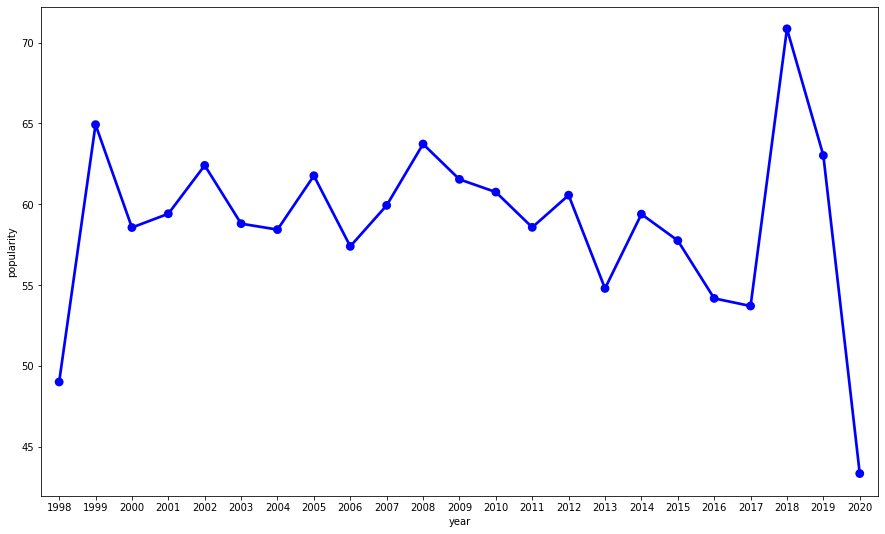

In [14]:
#vemos ahora la popularidad promedio a lo largo de los años
agrup_años = songs.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(15, 9))

ax = sns.pointplot(x = 'year', y = 'popularity', data=agrup_años, color = 'blue', label='tip')

**Observamos que la popularidad a lo largo de los años oscila entre los 55 y 65 puntos, exceptuando los dos años con pocos datos mencionados anteriormente (1998 y 2020) y el año 2018 que promedia por encima de los 70 puntos.**

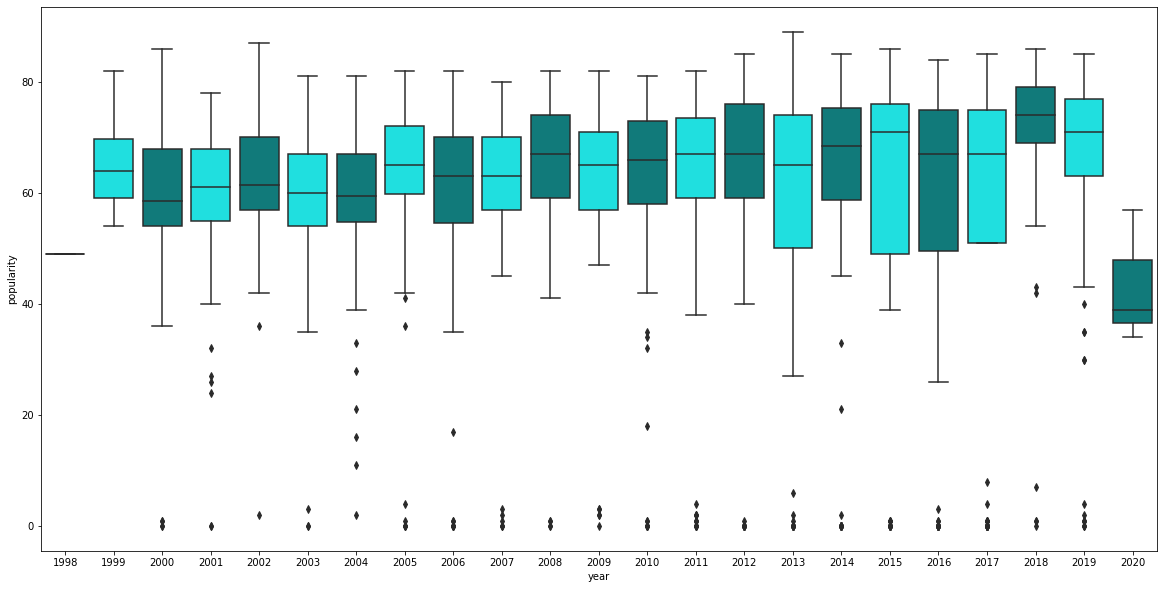

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot (x= songs['year'], y = songs['popularity'], palette=['#008B8B','#00FFFF'])

plt.show()

**Lo que analizamos en este caso es la popularidad de las canciones lanzadas desde el año 1998 al 2020 y su comparativa.**
* **Podemos ver que la popularidad más importante se alcanzó en 2013.**
* **Encontramos una gran cantidad de outliers, lo cual es lógico ya que depende muchas veces de la cantidad de canciones y la particularidad de cada una de ellas.**
* **Del 2014 al 2019 la mediana se estableció en valores más altos que los anteriores a 2014**


# **Realizaremos ahora un boxplot para identificar valores anomalos en las variables de nuestro dataset**

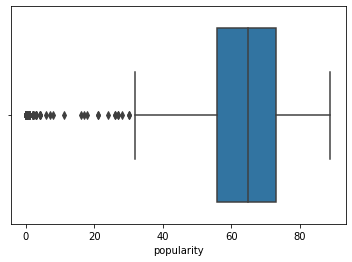

In [16]:
#graficamos el boxplot para popularity
sns.boxplot(x=songs['popularity'])

**Vemos que los valores de nuestra variable target menores a 30 son outliers, por lo que sería conveniente eliminarlos para mejorar nuestro modelo**

In [18]:
#comenzamos eliminando los valores de popularity menores a 20
songs = songs.drop(songs.index[songs['popularity']<20])

(1999, 18)

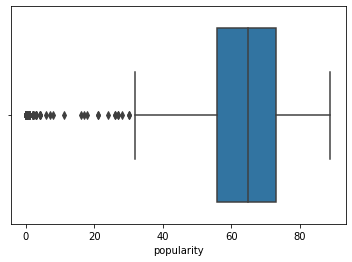

In [17]:
#volvemos a graficar el boxplot para popularity
sns.boxplot(x=songs['popularity'])
songs.shape

**Ahora los outliers son mucho menos, nuestro dataset se redujo en 184 filas**

# **Realizaremos ahora un análisis de correlación entre las variables numéricas de nuestro dataset**

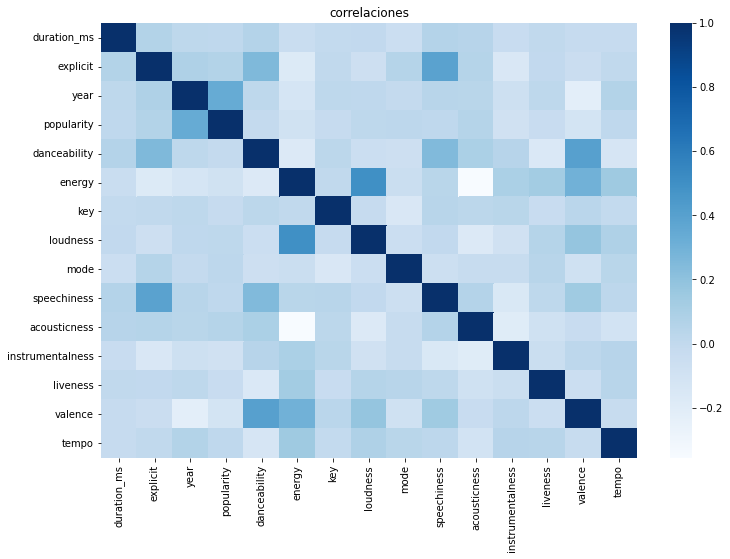

In [19]:
#usamos el metodo de correlacion spearman
met_corr_spearman = songs.corr('spearman')


plt.figure(figsize=(12,8))
sns.heatmap(met_corr_spearman, cmap="Blues")
plt.title('correlaciones');

**Vemos que nuestra variable target solo presenta una correlación alta con la variable año, sin embargo este análisis no tiene en cuenta las variables object que fueron las que identificamos como más importantes: artist, song, genre**

**Se observan también correlaciones altas entre las siguientes variables:**

* **Explicit y speechiness**
* **Explicit y danceability**
* **Energy y loudness**
* **Energy y valence**
* **Valence y danceability** 


# **ANÁLISIS MULTIVARIADO**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Popularity')

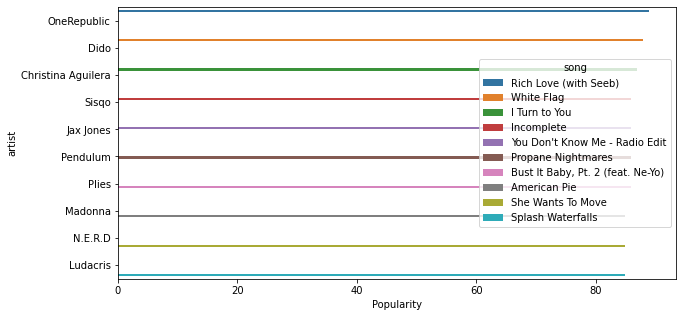

In [20]:
#Realizamos un Barplot para ver los artistas que mayor nivel de "popularity" consiguieron con sus canciones, y sumamos un label con el nombre de la cancion
plt.figure(figsize=(10, 5))
artistas = songs.nlargest(10, ['popularity']).set_index('artist')
sns.barplot(artistas['popularity'], artistas.index, ci = None, hue = artistas['song'])
plt.xlabel('Popularity')

**Observamos que los 10 artistas que mayor 'popularity' obtuvieron con una de sus canciones no se encuentran dentro del top 20 de artistas con mayor cantidad de canciones en el dataset.**

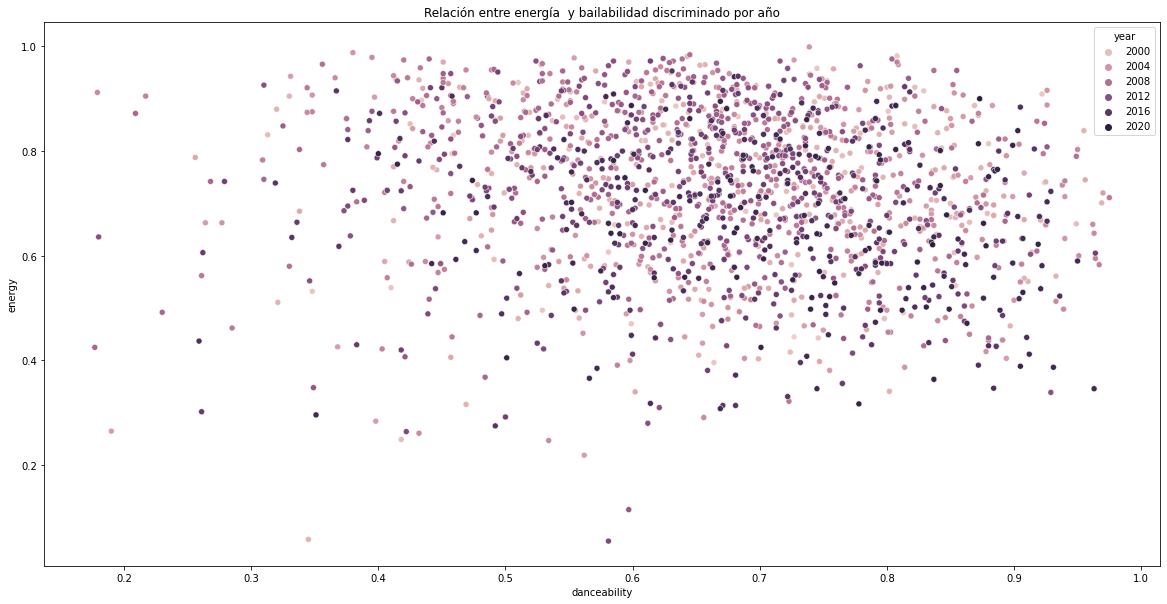

In [21]:
x= songs['danceability']
y= songs['energy']
plt.figure(figsize=(20,10))
sns.scatterplot (data= songs, x='danceability', y= 'energy', color= 'g', hue = 'year')
plt.title('Relación entre energía  y bailabilidad discriminado por año')

#plt.xlabel('')

plt.show()

**Hay un sesgo de orientación positiva, que, si bien encuentra varios outliers, podemos identificar que existe una relación entre valores altos de energía con la bailabilidad de esas canciones.**

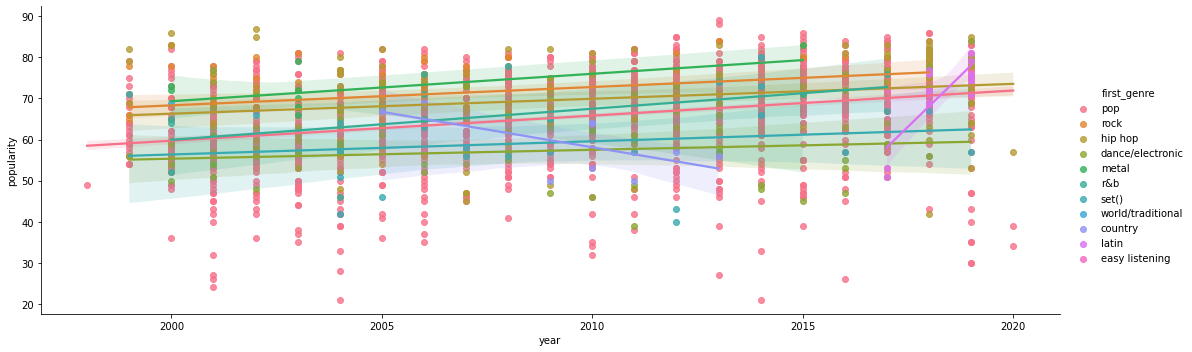

In [41]:
# Utilizamos el primer genero
songs['first_genre'] = songs['genre'].str.split(',').apply(lambda x: x[0].lower())

#buscamos la popularidad de las canciones por año, y después buscar qué es lo que hace popular a una canción

sns.lmplot(x='year', y='popularity', hue='first_genre', data=songs, aspect=3);

## **Las canciones más recientes son más populares.**

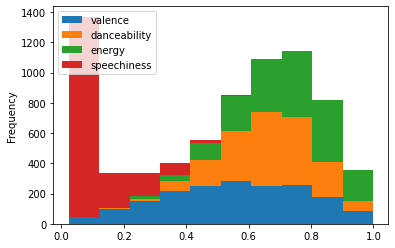

<Figure size 1440x720 with 0 Axes>

In [38]:
#Buscamos la relación de la positividad, bailabilidad, energía y palabras de una canción

songs[["valence", "danceability", "energy", "speechiness"]].plot.hist(stacked=True)

plt.figure(figsize=(20,10));

Encontramos que a mayor palabras hay menos positividad, y que aquellas canciones que son bailables y con energía son consideradas positivas

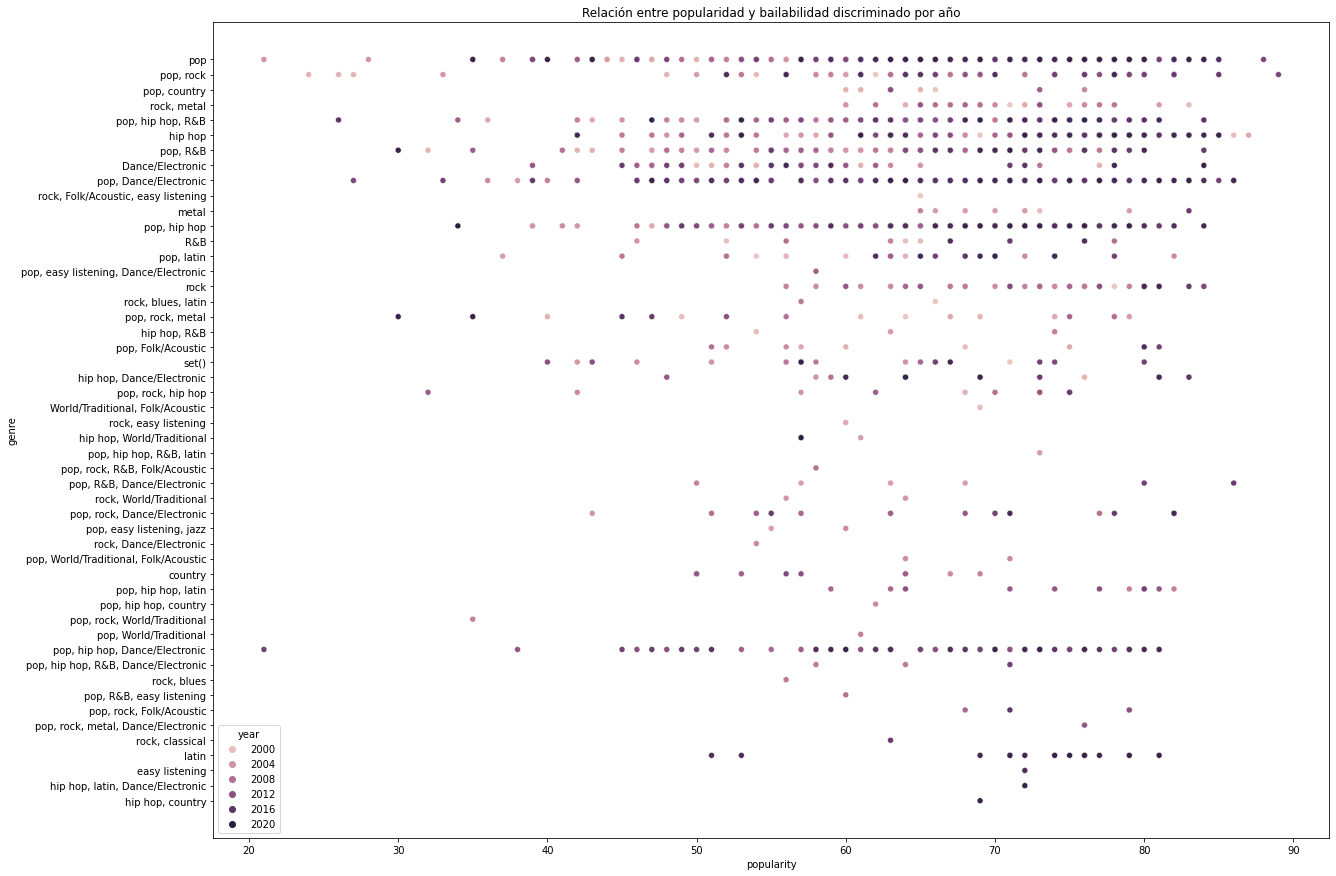

In [42]:
# Utilizamos el primer genero
songs['first_genre'] = songs['genre'].str.split(',').apply(lambda x: x[0].lower())

x= songs['popularity']
y= songs['danceability']
plt.figure(figsize=(20,15))
sns.scatterplot (data= songs, x='popularity', y= 'genre', color= 'g', hue = 'year')
plt.title('Relación entre popularidad y bailabilidad discriminado por año')

#plt.xlabel('')

plt.show()

Identificamos y confirmamos que aquellas canciones más populares son el género pop, de años más recientes

In [54]:
import plotly.express as px

#grafico de tres dimensiones tomando en cuenta bailabilidad, energía y popularidad

fig = px.scatter_3d(songs, x='danceability', y='energy', z='popularity', color='first_genre')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D para identificar donde se agrupa la popularidad",
        'y':0.8,
        'x':0.02
         })
